In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
#initialization
n = 50
dx = 1/n
dt = (dx**2)/4 #this is too make sure that dtD/dt*2 = 1/4 over varying n
print(f'dt = {dt}')
x = np.linspace(0,1,n+1)
D = 1
print(dt*D/(dx**2)) # this must be 1/4

dt = 0.0001
0.25


Implementation of Jacobi iteration method as an update of our function over the matrix: 

In [3]:
def jacobi(matrix):
    n = len(matrix)
    next_matrix = np.copy(matrix)
        
    for j in range (1, n-1):
            
        # west boundary case where x = 0:
        next_matrix[j,0] = 1/4 * (matrix[j,1] + matrix[j,-2] + matrix[j+1,0] + matrix[j-1,0])

        # non-boundary case 
        for i in range (1, n-1):
            next_matrix[j,i] = 1/4 * (matrix[j,i+1] + matrix[j,i-1] + matrix[j+1,i] + matrix[j-1,i])

        # east boundary case where x = n:
        next_matrix[j,-1] = 1/4 * (matrix[j,1] + matrix[j,-2] + matrix[j+1,-1] + matrix[j-1,-1])
            
    return next_matrix

In [4]:
#calculating the number of Jacobi iteration needed to achieve stability at error < 10^-5

domain = np.zeros((n ,n))
domain[0, :] = 1
conv = 1
iter = 0

while conv > 1e-5:
    diff = jacobi(domain) - domain 
    conv = np.max(diff)
    domain = jacobi(domain)
    iter += 1
print(iter)

4068


Implementation of Gauss-Seidel iteration method as an update of our function over the matrix: 

In [5]:
def gauss_seidel(matrix):
    n = len(matrix)
    next_matrix = np.copy(matrix)
        
    for j in range (1, n-1):
            
        # west boundary case where x = 0:
        next_matrix[j,0] = 1/4 * (matrix[j,1] + matrix[j,-2] + matrix[j+1,0] + next_matrix[j-1,0])

        # non-boundary case 
        for i in range (1, n-1):
            next_matrix[j,i] = 1/4 * (matrix[j,i+1] + next_matrix[j,i-1] + matrix[j+1,i] + next_matrix[j-1,i])

        # east boundary case where x = n:
        next_matrix[j,-1] = 1/4 * (matrix[j,1] + matrix[j,-2] + matrix[j+1,-1] + next_matrix[j-1,-1])
            
    return next_matrix

In [6]:
#calculating the number of Gauss Seildel iteration needed to achieve stability at error < 10^-5

domain = np.zeros((n ,n))
domain[0, :] = 1
conv = 1
iter = 0

while conv > 1e-5:
    diff = gauss_seidel(domain) - domain 
    conv = np.max(diff)
    domain = gauss_seidel(domain)
    iter += 1
print(iter)

2384


In [10]:
domain_j = np.zeros((n ,n))
domain_j[0, :] = 1
domain_gs = np.copy(domain_j)

# Initialize counters of iterations and convergence tracking for jacobi and GS seperately
conv_j = 1
conv_gs = 1
iter_j = 0
iter_gs = 0

# Define the threshold values we want to track our convergence for  
n_threshold = 20
threshold_j = np.array([10**-i for i in np.linspace(1, n_threshold, n_threshold)])
threshold_gs = np.copy(threshold_j)
threshold = np.copy(threshold_j)

# lists to save our required iterations per threshold
jacobi_iter = []
gauss_seidel_iter = []

'''
This runs both Jacobi and GS method and tracks when they stabilize under a certain threshold
i.e. |M^k+1 - M^k| < threshold
'''

while threshold_j.size > 0 or threshold_gs.size > 0:

    # save number iterations needed for jacobi to reach our thresholds of precision

    if threshold_j.size > 0:
        iter_j += 1
        diff_j = jacobi(domain_j) - domain_j 
        conv_j = np.max(diff_j)
        if conv_j < threshold_j[0]:
            jacobi_iter.append(iter_j)
            threshold_j = threshold_j[1:]
        domain_j = jacobi(domain_j)

    # save number iterations needed for gauss seidel to reach our thresholds of precision

    if threshold_gs.size > 0:
        iter_gs += 1
        diff_gs = gauss_seidel(domain_gs) - domain_gs 
        conv_gs = np.max(diff_gs)
        if conv_gs < threshold_gs[0]:
            gauss_seidel_iter.append(iter_gs)
            threshold_gs = threshold_gs[1:]
        domain_gs = gauss_seidel(domain_gs)

print(jacobi_iter, gauss_seidel_iter)

[3, 24, 243, 1828, 4068, 6308, 8548, 10789, 13029, 15269, 17509, 19750, 21990, 24230, 26468, 29362, 29752, 29753, 29754, 29755] [3, 24, 239, 1252, 2384, 3516, 4648, 5780, 6912, 8044, 9176, 10308, 11440, 12573, 13722, 15067, 15145, 15146, 15147, 15148]


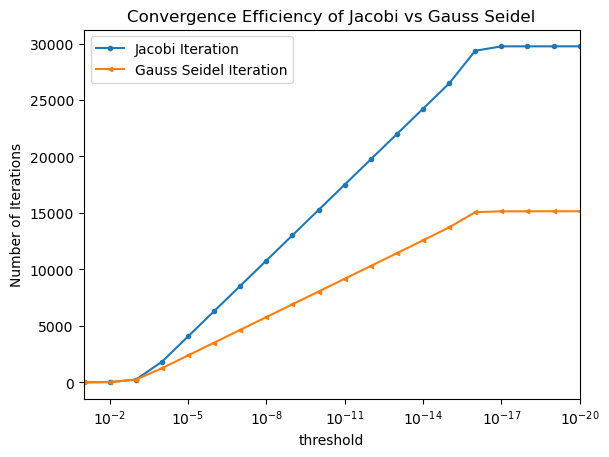

In [14]:
plt.semilogx(threshold, jacobi_iter, label='Jacobi Iteration', linestyle='-', marker='o', markersize=3)
plt.semilogx(threshold, gauss_seidel_iter, label='Gauss Seidel Iteration', linestyle='-', marker='<', markersize=3)
plt.xlim(max(threshold), min(threshold))  # Reverse the x-axis
plt.xlabel("threshold")
plt.ylabel("Number of Iterations")
plt.title("Convergence Efficiency of Jacobi vs Gauss Seidel")
plt.legend()
plt.show()